In [16]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation


import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Step 1: Loading Dataset

In [17]:
df = pd.read_csv('Data\FS_Classification_AMZN_Historical_Quarterly_2009_2022_With_Fundamental_Data_Economic_Indicators.csv')

# Removing leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Using a regular expression to replace multiple spaces with a single space in all column names
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  

# # Dropping columns that are not needed
df.drop(["Date", "Year"], axis=1, inplace=True)



# Step 2: Overview of Dataset

In [18]:
num_of_rows = len(df)
print(f"The number of rows is {num_of_rows}")
print('\n')

df.info()

The number of rows is 56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Open                            56 non-null     float64
 1   High                            56 non-null     float64
 2   Low                             56 non-null     float64
 3   Close                           56 non-null     float64
 4   Volume                          56 non-null     int64  
 5   MA_21                           56 non-null     float64
 6   RSI                             56 non-null     float64
 7   MACD                            56 non-null     float64
 8   Stochastic_Oscillator           56 non-null     float64
 9   ATR                             56 non-null     float64
 10  Momentum_21                     56 non-null     float64
 11  OBV                             56 non-null     int64  
 12  Cumulative_

In [19]:
df.head()

,Open,High,Low,Close,Volume,MA_21,RSI,MACD,Stochastic_Oscillator,ATR,...,capitalExpenditures,changeInReceivables,changeInInventory,surprisePercentage,grossProfit,costOfRevenue,costofGoodsAndServicesSold,incomeTaxExpense,Forward_Return,Price_Movement_Class
0,2.5675,3.7805,2.3815,3.6720,12370496000,3.070679,58.512097,0.136847,65.430878,0.116978,...,5.245475e+09,-1.304035e+09,5.510164e+08,0.0,4.510000e+08,4.438000e+09,3.741000e+09,69000000.0,13.916127,4
1,3.6510,4.4280,3.5855,4.1830,9494416000,3.910458,55.309698,0.023607,58.383477,0.102840,...,7.800000e+07,-1.600000e+07,2.300000e+07,0.0,1.133000e+09,3.808000e+09,3.518000e+09,39000000.0,11.594552,4
2,4.2210,4.7250,3.7705,4.6680,8324122000,4.182420,53.239807,0.126727,53.727712,0.092900,...,1.030000e+08,1.550000e+08,2.760000e+08,0.0,1.273000e+09,4.504000e+09,4.176000e+09,60000000.0,44.087393,4
3,4.6250,7.2955,4.4135,6.7260,12727852000,5.718096,63.826041,0.116955,69.004807,0.140652,...,1.370000e+08,5.090000e+08,3.390000e+08,0.0,1.977000e+09,8.029000e+09,7.543000e+09,85000000.0,0.929230,2
4,6.8125,6.9095,5.6910,6.7885,11980988000,6.306039,51.020327,0.142294,48.488807,0.131931,...,1.400000e+08,-4.540000e+08,-3.210000e+08,0.0,1.206000e+09,5.918000e+09,5.501000e+09,100000000.0,-19.525669,0


# Step 3: EDA - Missing Values Analysis 

## Step 3)i): EDA - Show Missing Values in each Column

In [20]:
def display_columns_with_null_values(df: pd.DataFrame):
    """
    Displays the total number of null values for each column in the dataframe,
    showing only columns that have null values.
    
    Parameters:
    - df (pd.DataFrame): The dataframe to be checked for null values.
    
    Returns:
    - None: Prints the columns with null values and their counts.
    """
    
    # Get total null values in each column
    total_null_values = df.isnull().sum()
    
    # Filter out columns that don't have any null values
    columns_with_null = total_null_values[total_null_values > 0].sort_values(ascending=False)
    
    # Check if there are any columns with null values
    if not columns_with_null.empty:
        print('-' * 64)
        print("Total null values in each column (only columns with null values)")
        print('-' * 64)
        print(columns_with_null)
    else:
        print('-' * 64)
        print("Total null values in each column (only columns with null values)")
        print('-' * 64)
        print("No columns have null values.")

In [21]:
# Get percentage of null values in each column
null_values_percentage = df.isnull().mean().round(4).mul(100).sort_values(ascending=False)
print('-' * 44)
print("Percentage(%) of null values in each column")
print('-' * 44)
print(null_values_percentage)
print('\n')

# Get total null values in each column
display_columns_with_null_values(df)


--------------------------------------------
Percentage(%) of null values in each column
--------------------------------------------
Open                              0.0
High                              0.0
Low                               0.0
Close                             0.0
Volume                            0.0
MA_21                             0.0
RSI                               0.0
MACD                              0.0
Stochastic_Oscillator             0.0
ATR                               0.0
Momentum_21                       0.0
OBV                               0.0
Cumulative_Return                 0.0
Volatility                        0.0
Price_Gap                         0.0
Consumer_Price_Index_Quarterly    0.0
Durable_Goods_Orders_Quarterly    0.0
Retail_Sales_Quarterly            0.0
Unemployment_Rate_Quarterly       0.0
cashAndShortTermInvestments       0.0
inventory                         0.0
shortTermInvestments              0.0
otherCurrentAssets            

## Step 3)ii): EDA - Handling Missing Values

In [22]:
# Fill Null Values in the Remaining Columns with the average of the column
numeric_df = df.select_dtypes(include=[np.number]) # Select only numeric columns
numeric_df.fillna(numeric_df.mean(), inplace=True)  # Fill missing values in numeric columns with the column mean
df[numeric_df.columns] = numeric_df # Merge back with non-numeric columns if needed

# Get total null values in each column
display_columns_with_null_values(df)


----------------------------------------------------------------
Total null values in each column (only columns with null values)
----------------------------------------------------------------
No columns have null values.


# Step 4: EDA - Duplicate Values Analysis 

## Step 4)i): EDA - Show Duplicate Values Rows

In [23]:
# Get percentage of duplicate rows
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_percentage = (duplicate_rows / total_rows) * 100

print('-' * 48)
print("Percentage(%) of duplicate rows in the DataFrame")
print('-' * 48)
print(f"{duplicate_percentage:.2f}%")
print('\n')

# Get total number of duplicate rows
print('-' * 30)
print("Total number of duplicate rows")
print('-' * 30)
print(duplicate_rows)


------------------------------------------------
Percentage(%) of duplicate rows in the DataFrame
------------------------------------------------
0.00%


------------------------------
Total number of duplicate rows
------------------------------
0


# Step 5): EDA - Feature Scaling 

## Step 5)i): EDA - Categorical Feature Scaling

## Step 5)ii): EDA - Numerical Feature Scaling

In [24]:
df.head()

,Open,High,Low,Close,Volume,MA_21,RSI,MACD,Stochastic_Oscillator,ATR,...,capitalExpenditures,changeInReceivables,changeInInventory,surprisePercentage,grossProfit,costOfRevenue,costofGoodsAndServicesSold,incomeTaxExpense,Forward_Return,Price_Movement_Class
0,2.5675,3.7805,2.3815,3.6720,12370496000,3.070679,58.512097,0.136847,65.430878,0.116978,...,5.245475e+09,-1.304035e+09,5.510164e+08,0.0,4.510000e+08,4.438000e+09,3.741000e+09,69000000.0,13.916127,4
1,3.6510,4.4280,3.5855,4.1830,9494416000,3.910458,55.309698,0.023607,58.383477,0.102840,...,7.800000e+07,-1.600000e+07,2.300000e+07,0.0,1.133000e+09,3.808000e+09,3.518000e+09,39000000.0,11.594552,4
2,4.2210,4.7250,3.7705,4.6680,8324122000,4.182420,53.239807,0.126727,53.727712,0.092900,...,1.030000e+08,1.550000e+08,2.760000e+08,0.0,1.273000e+09,4.504000e+09,4.176000e+09,60000000.0,44.087393,4
3,4.6250,7.2955,4.4135,6.7260,12727852000,5.718096,63.826041,0.116955,69.004807,0.140652,...,1.370000e+08,5.090000e+08,3.390000e+08,0.0,1.977000e+09,8.029000e+09,7.543000e+09,85000000.0,0.929230,2
4,6.8125,6.9095,5.6910,6.7885,11980988000,6.306039,51.020327,0.142294,48.488807,0.131931,...,1.400000e+08,-4.540000e+08,-3.210000e+08,0.0,1.206000e+09,5.918000e+09,5.501000e+09,100000000.0,-19.525669,0


In [25]:
from sklearn.preprocessing import StandardScaler

def standard_scale_dataframe(dataframe, columns_to_scale):
    """
    Scales the specified columns of the DataFrame using Standard Scaling (Z-score normalization).
    :param dataframe: pandas DataFrame
    :param columns_to_scale: list of strings, names of columns to scale
    :return: DataFrame with scaled columns
    """
    # Create a copy of the DataFrame to avoid modifying the original one
    df_scaled = dataframe.copy()

    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Perform Standard Scaling on specified columns and update the DataFrame
    df_scaled[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])

    return df_scaled


columns = list(df.columns)

numerical_features = columns
numerical_features.remove('Price_Movement_Class')

scaled_df = standard_scale_dataframe(dataframe=df, 
                                    columns_to_scale=numerical_features)

df = scaled_df
df.head()

,Open,High,Low,Close,Volume,MA_21,RSI,MACD,Stochastic_Oscillator,ATR,...,capitalExpenditures,changeInReceivables,changeInInventory,surprisePercentage,grossProfit,costOfRevenue,costofGoodsAndServicesSold,incomeTaxExpense,Forward_Return,Price_Movement_Class
0,-0.950322,-0.957895,-0.958412,-0.964118,2.935873,-0.961963,0.525744,0.054664,0.675243,-0.795780,...,0.179239,-0.008799,-0.040973,-0.2998,-0.788943,-1.017709,-1.099045,-0.314132,0.397042,4
1,-0.930186,-0.947167,-0.933303,-0.954520,1.625335,-0.946319,0.071870,-0.027696,0.050056,-0.806959,...,-0.784828,0.602659,-0.392539,-0.2998,-0.760013,-1.040344,-1.108798,-0.374411,0.254656,4
2,-0.919593,-0.942246,-0.929444,-0.945411,1.092069,-0.941253,-0.221494,0.047303,-0.362965,-0.814817,...,-0.780164,0.683836,-0.224086,-0.2998,-0.754074,-1.015338,-1.080021,-0.332215,2.247496,4
3,-0.912085,-0.899658,-0.916035,-0.906758,3.098709,-0.912647,1.278884,0.040196,0.992292,-0.777061,...,-0.773820,0.851887,-0.182139,-0.2998,-0.724211,-0.888691,-0.932765,-0.281983,-0.399466,2
4,-0.871432,-0.906053,-0.889392,-0.905584,2.758387,-0.901695,-0.536058,0.058626,-0.827717,-0.783956,...,-0.773261,0.394731,-0.621583,-0.2998,-0.756917,-0.964536,-1.022072,-0.251844,-1.653999,0


# Step 9) Train Test Split

In [26]:
df['Price_Movement_Class'].value_counts().sort_index()

Price_Movement_Class
0    10
1     7
2     3
3     2
4    34
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop("Price_Movement_Class", axis=1)
y = df["Price_Movement_Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    shuffle=False)

# Step 10) AdaBoost Model

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def Confusion_Matrix_For_Multi_Class_With_Overview(title, y_test, y_pred):
    """
    Create a confusion matrix for multi-class classification with detailed overview.

    Parameters:
    - title: Title for the confusion matrix plot.
    - y_test: True labels of the test data.
    - y_pred: Predicted labels of the test data.

    Returns:
    - A seaborn heatmap representing the confusion matrix.
    """

    # Creating the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Determine class labels
    class_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Calculate the counts and percentages for the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    
    # Calculate TP and FP percentages
    TP_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix, axis=1)[i]) for i, value in enumerate(np.diag(cf_matrix))]
    FP_percentages = ["{0:.2%}".format((np.sum(cf_matrix, axis=0)[i] - value)/np.sum(cf_matrix)) for i, value in enumerate(np.diag(cf_matrix))]
    
    # Combine TP and FP with their percentages
    combined_info = []
    for i in range(cf_matrix.shape[0]):
        for j in range(cf_matrix.shape[1]):
            value = cf_matrix[i, j]
            if i == j:  # True Positive
                combined_info.append(f"{value}\n(TP: {TP_percentages[i]})")
            else:  # False Positive
                combined_info.append(f"{value}\n(FP: {FP_percentages[j]})")

    labels = np.asarray(combined_info).reshape(cf_matrix.shape)

    # Plotting the heatmap
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f'{title}\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')

    # Show the plot
    plt.show()

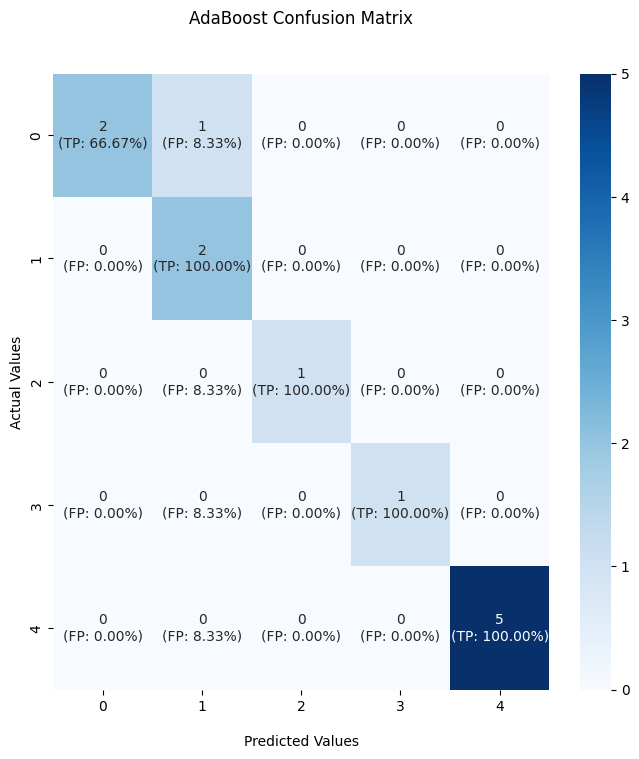

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5

    accuracy                           0.92        12
   macro avg       0.93      0.93      0.92        12
weighted avg       0.94      0.92      0.92        12



In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def AdaBoost_Train_Evaluate(X_train, 
                            X_test, 
                            y_train, 
                            y_test, 
                            n_estimators=50, 
                            learning_rate=1.0, 
                            algorithm='SAMME', 
                            random_state=None):
   
    # Initialize the AdaBoost model
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, 
                               algorithm=algorithm, random_state=random_state)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Create a DataFrame for the actual and predicted values
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    # Creating Confusion Matrix
    Confusion_Matrix_For_Multi_Class_With_Overview("AdaBoost Confusion Matrix", y_test, y_pred)
    
    # Creating Classification Report
    print(classification_report(y_test, y_pred))
    return df, model


"""
Best Parameters: {
    'n_estimators': 455, 
    'learning_rate': 0.013404952562460182
    }
Best Score: 0.9174603174603174
"""

df, model = AdaBoost_Train_Evaluate(X_train, 
                                    X_test, 
                                    y_train, 
                                    y_test, 
                                    n_estimators=489, 
                                    learning_rate=0.9956,
                                    algorithm='SAMME.R',
                                    random_state=42)

# Step 11) AdaBoost Hyperparameter Tuning

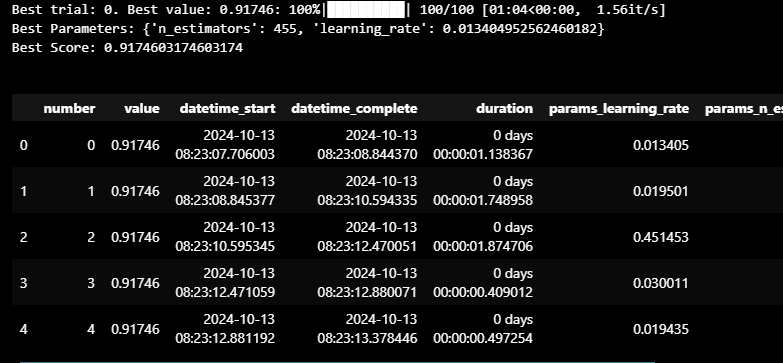

In [30]:
# import optuna
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import cross_val_score

# # Suppress Optuna output
# optuna.logging.set_verbosity(optuna.logging.CRITICAL)


# # Objective function for Optuna
# def objective(trial):
#     # Define the hyperparameters to optimize
#     n_estimators = trial.suggest_int('n_estimators', 50, 500)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 1.0)
    
#     # Initialize the model with the suggested hyperparameters
#     ada = AdaBoostClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate
#     )
    
#     # Perform cross-validation
#     # Replace X_train and y_train with your training data
#     score = cross_val_score(ada, X_train, y_train, cv=10, scoring='f1_macro', n_jobs=-1, verbose=0)
    
#     # Return the mean accuracy score
#     return score.mean()


# # Create a study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100, timeout=None, show_progress_bar=True)

# # Print the best parameters and the best score
# print("Best Parameters:", study.best_params)
# print("Best Score:", study.best_value)

# # Get the detailed study results
# df = study.trials_dataframe()
# df_sorted = df.sort_values('value', ascending=False)
# df_sorted.head()